In [29]:
# aplicando tecnicas de ingenieria de caracteristicas del libro "feature_engineering_bookcamp" de "SINAN OZDEMIR"
# https://github.com/sinanuozdemir/feature_engineering_bookcamp

# IMPORTS 
%run ./Base.ipynb

# IMPORTS

In [3]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# from feature_engine.encoding import OrdinalEncoder, OneHotEncoder
from feature_engine.encoding import RareLabelEncoder, MeanEncoder
from feature_engine.discretisation import DecisionTreeDiscretiser
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer,
)

In [4]:

# load trainset
def train_load():
    train = pd.read_csv('train.csv', index_col = "Id")
    test = pd.read_csv('test.csv', index_col = "Id")
    all_df=pd.concat([train,test], axis = "rows")
    return train, test, all_df

train,test,all_df = train_load()

In [5]:
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [6]:
# PORCENTAJES de VALORES FALTANTES
display(train.isnull().mean().sort_values(ascending = True).tail(20))

RoofMatl        0.000000
Electrical      0.000685
MasVnrArea      0.005479
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageYrBlt     0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageCond      0.055479
GarageType      0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
MasVnrType      0.597260
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [7]:
# drop some variables
train.drop(
    labels=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'],
    axis=1,
    inplace=True
)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyle    

# Listas de caracteristicas

In [9]:
train2= train.copy()
y=train.pop("SalePrice")
X=train

# make a list of categorical variables
# categorical = [var for var in train.columns if train[var].dtype == 'O' and train[var].nunique() > 2]
categorical = [var for var in train.columns if train[var].dtype == 'O']

# LISTA DE VARIABLES NUMERICAS
numerical = [var for var in train.columns if train[var].dtype != 'O']

# LISTA DE VARIABLES NUMERICAS CONTINUAS
continuas = [var for var in numerical if pd.api.types.is_float_dtype(train[var])]

# LISTA DE VARIABLES NUMERICAS DISCRETAS
discretas = [var for var in numerical if pd.api.types.is_integer_dtype(train[var])]

# LISTA DE VARIABLES BINARIAS
# binary_categorical = [var for var in train.columns if train[var].dtype =='O' and train[var].nunique() == 2]
# binary_categorical = [var for var in train.columns if train[var].dtype =='O']

# LO DE ABAJO NO ES NECESARIO EN ESTE PROBLEMA: 

# # LISTA DE VARIABLES DE ALTA CARDINALIDAD >10
# alta_card = [var for var in categorical if len(train[var]) > 10]

# # LISTA DE VARIABLES DE BAJA CARDINALIDAD <10
# baja_card = [var for var in categorical if len(train[var]) <10]

# train[baja_card]

In [10]:
# train[categorical].nunique()

In [11]:
y.isnull().mean()

np.float64(0.0)

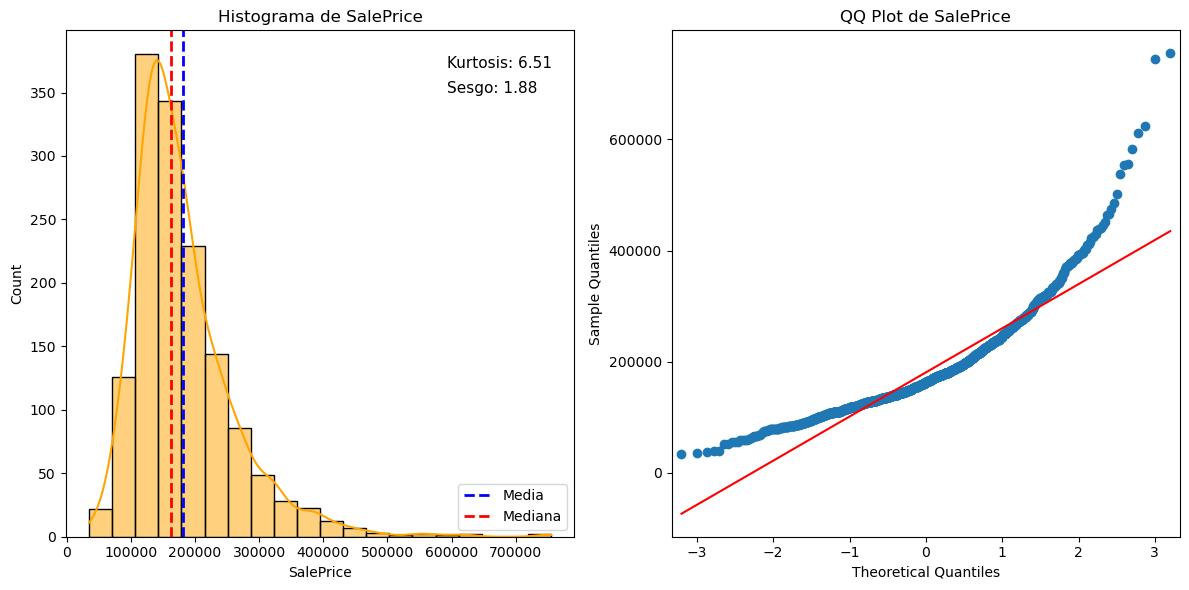

CPU times: total: 1.53 s
Wall time: 1.44 s


In [12]:
%%time
# sns.histplot(data=train, x="SalePrice", kde=True, bins=20)
# sns.histplot(data=train, x="SalePrice", kde=True, bins=20, color = "orange")

# Calcular kurtosis, sesgo, media y mediana
kurtosis_value = stats.kurtosis(train2["SalePrice"])
skewness_value = stats.skew(train2["SalePrice"])
mean_value = train2["SalePrice"].mean()
median_value = train2["SalePrice"].median()

# Configurar el tamaño de las figuras
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma con KDE
sns.histplot(data=train2, x="SalePrice", kde=True, bins=20, color="orange", ax=axes[0])
axes[0].set_title('Histograma de SalePrice')

# Añadir líneas de media y mediana
axes[0].axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label='Media')
axes[0].axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Mediana')
axes[0].legend()

# Mostrar kurtosis y sesgo a la derecha del histograma
axes[0].text(0.75, 0.95, f'Kurtosis: {kurtosis_value:.2f}', transform=axes[0].transAxes, fontsize=11, verticalalignment='top')
axes[0].text(0.75, 0.90, f'Sesgo: {skewness_value:.2f}', transform=axes[0].transAxes, fontsize=11, verticalalignment='top')

# QQ Plot
qqplot(train2["SalePrice"], line='s', ax=axes[1])
axes[1].set_title('QQ Plot de SalePrice')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

In [13]:
# train[categorical].nunique()

CPU times: total: 2.36 s
Wall time: 2.44 s


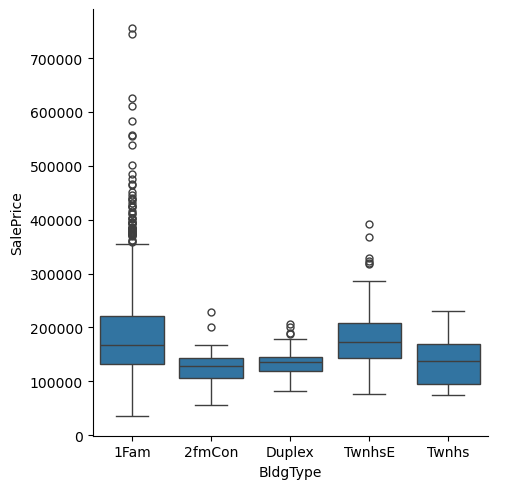

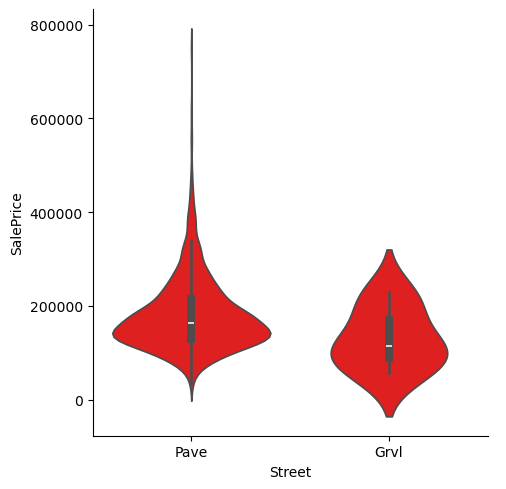

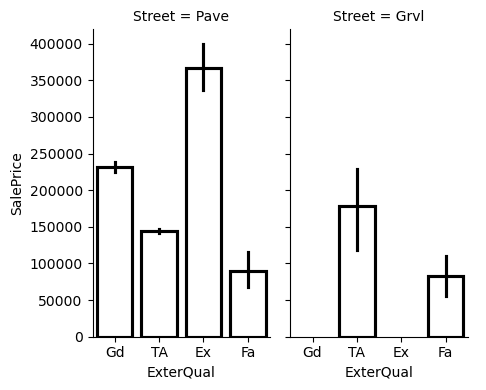

In [14]:
%%time
# train.Utilities
sns.catplot(data=train2, x="BldgType",
            y="SalePrice", kind="box")

sns.catplot(data=train2, x="Street",
            y="SalePrice", kind="violin", color="red")

sns.catplot(
    data=train2, x="ExterQual", y="SalePrice", col="Street",
    kind="bar", height=4, aspect=.6,
    color = "black", fill = False
)

CPU times: total: 391 ms
Wall time: 534 ms


<Axes: xlabel='LotArea', ylabel='SalePrice'>

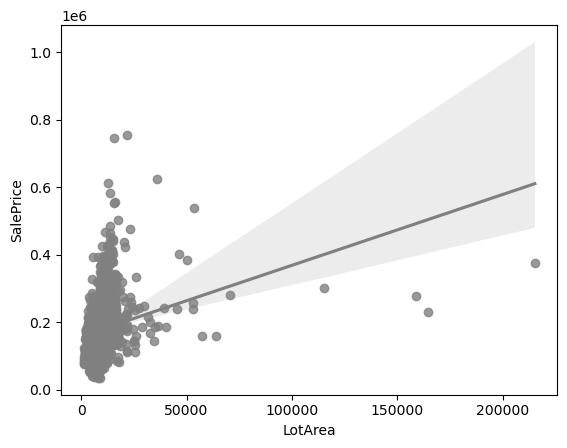

In [15]:
%%time
sns.regplot(data=train2, x="LotArea", y="SalePrice", color="grey")

# Feature Enginering - A lo que vinimos ...

La idea es seguir el enfoque del libro ("contrastación de hipotesis"). Este es un set de datos para un problema de "regression", lo saque de un sitio de competencias de ciencias de datos. En el libro se utilizo un dataset para un problema de clasificación binaria (Flu o Covid?) por lo que en mi caso me vi obligado a modificar su "baseline" para readaptarlo a este tipo de problema.

In [16]:


x_train, x_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.2
)


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Suponiendo que binary_categorical contiene el nombre de las columnas binarias
# binary_pipeline = Pipeline(
#     [
#         ('select_categorical_features', FunctionTransformer(lambda df: df[binary_categorical])),
#         ('label_encode', OrdinalEncoder()),  # Aplica la codificación de etiquetas
#         # ('fillna', SimpleImputer(strategy='most_frequent')),  # Imputación
#         ('fillna', SimpleImputer(strategy='constant', fill_value=False))
#     ]
# ) 
#>>#>># vemos que no ayuda en nada. por lo que la descartamos



# deal with numerical columns
numerical_pipeline = Pipeline(
[
('select_numerical_features', FunctionTransformer(lambda df: df[numerical])),
('impute', SimpleImputer(strategy='median')),
]
)

# Pipeline para columnas categóricas usando solo scikit-learn
categorical_pipeline = Pipeline([
    # Seleccionar solo las columnas categóricas
    ('select_categorical_features', FunctionTransformer(lambda df: df[categorical], validate=False)),
    # Imputar valores faltantes con una etiqueta específica (por ejemplo, "Missing")
    ('categorical_imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    # Codificación ordinal
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [18]:
# ONLY NUMERICALS test
simple_grid_search_regressor(x_train, y_train, x_test, y_test, numerical_pipeline)

Overall took 17.93 seconds
MSE:  1194773784.2004504
MAE:  19160.62183090941


LGBMRegressor(max_depth=10, n_estimators=50, n_jobs=-1, objective='regression',
              verbose=-1)

In [19]:
# ONLY CATEGORICALS
simple_grid_search_regressor(x_train, y_train, x_test, y_test, categorical_pipeline)

Overall took 12.05 seconds
MSE:  1794746922.4444025
MAE:  25860.92244246101


LGBMRegressor(max_depth=10, n_jobs=-1, objective='regression', verbose=-1)

In [20]:
# UNION
simple_fe = FeatureUnion([
('numerical_pipeline', numerical_pipeline),
('categorical_pipeline', categorical_pipeline)
])

display(simple_fe.fit_transform(x_train, y_train).shape)
best_model = simple_grid_search_regressor(x_train, y_train, x_test, y_test, simple_fe)

(1168, 76)

Overall took 10.08 seconds
MSE:  1065221090.257974
MAE:  17099.721669222286


In [21]:
# TEST MEAN # and standard scaler (normalizacion / estandarizacion / o sea media 0 y desv. estandar de 1)
from sklearn.preprocessing import StandardScaler

# deal with numerical columns
numerical_pipeline = Pipeline(
[
('select_numerical_features', FunctionTransformer(lambda df: df[numerical])),
('impute', SimpleImputer(strategy='mean')),
('scale', StandardScaler()) # scale our numerical features
]
)

simple_fe = FeatureUnion([
('numerical_pipeline', numerical_pipeline),
('categorical_pipeline', categorical_pipeline)
])

best_model = simple_grid_search_regressor(x_train, y_train, x_test, y_test, simple_fe)
# VEMOS QUE MEJORO en MAE y empeoro en MSE # RECORDEMOS QUE ESTAMOS UTILIZANDO PARA esta base line el modelo LGBoost

Overall took 9.36 seconds
MSE:  1086522872.6427834
MAE:  16860.166652806696


In [22]:
best_model

LGBMRegressor(max_depth=None, n_estimators=50, n_jobs=-1,
              objective='regression', verbose=-1)

In [23]:
# AHORA PROBAMOS CON UNA IMPUTACION DE VALORES ARBITRARIOS
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical])),
        ('impute', SimpleImputer(strategy='constant', fill_value=999)),
        ('scale', StandardScaler()) # recordemos que mejoro bastante
    ]
)

simple_fe = FeatureUnion([
('numerical_pipeline', numerical_pipeline),
('categorical_pipeline', categorical_pipeline)
])

best_model = simple_grid_search_regressor(x_train, y_train, x_test, y_test, simple_fe)
# MEJOR QUE ANTES EN CUANTO A MSE
# LIGERAMENTE peor en MAE

Overall took 9.69 seconds
MSE:  1042848567.0603285
MAE:  16845.262117569226


In [24]:
# Definimos el pipeline para procesar datos numéricos.
from sklearn.preprocessing import PowerTransformer
# numerical_pipeline = Pipeline(
#     [
#         # Paso 1: Seleccionar las características numéricas del DataFrame original.
#         ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        
#         # Paso 2: Aplicar la transformación de Box-Cox para normalizar los datos.
#         # La transformación de Box-Cox ayuda a estabilizar la varianza y a hacer que los datos se asemejen más a una distribución normal.
#         ('Box–Cox', PowerTransformer(method='Box–Cox', standardize=True)),
        
#         # Paso 3: Convertir la matriz resultante de la transformación de Box-Cox de nuevo a un DataFrame de pandas.
#         # Esto asegura que los datos sigan siendo fáciles de manipular y trabajar en pasos posteriores.
#         # ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))),
        
#         # Paso 4: Imputación de valores faltantes en los extremos de la distribución.
#         # Aquí se utiliza un imputador personalizado que utiliza un método gaussiano para rellenar los valores faltantes.
#         ('end_of_tail', EndOfTailImputer(imputation_method='gaussian'))
#     ]
# )
from feature_engine.imputation import EndTailImputer
# Apply box-cox transformation after scaling data and impute using gaussian end of tail

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical])),
        # ('box-cox', PowerTransformer(method='box-cox', standardize=True)),# solo pueden aplicarse a datos estrictamente positivos, por lo que da error
        ('yeo-johnson', PowerTransformer(method='yeo-johnson', standardize=True)), # puede aplicarse sobre datos positivos y negativos
        ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))),  # turn back into dataframe
        ('end_of_tail', EndTailImputer(imputation_method='gaussian')) # utiliza valores

    ]
)


simple_fe = FeatureUnion([
('numerical_pipeline', numerical_pipeline),
('categorical_pipeline', categorical_pipeline)
])

best_model = simple_grid_search_regressor(x_train, y_train, x_test, y_test, simple_fe)
# EMPEORO EN MAE


Overall took 9.36 seconds
MSE:  1048456288.1803867
MAE:  17186.222814683508


In [25]:
from sklearn.preprocessing import KBinsDiscretizer
numerical_pipeline = Pipeline(
[
('select_numerical_features', FunctionTransformer(lambda df: df[numerical])),
('yeo-johnson', PowerTransformer(method='yeo-johnson', standardize=True)),
('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))),
('end_of_tail', EndTailImputer(imputation_method='gaussian')), # # utiliza valores del extremo de la cola para imputar
('ordinal_bins', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'))
]
)

simple_fe = FeatureUnion([
('numerical_pipeline', numerical_pipeline),
('categorical_pipeline', categorical_pipeline)
])

best_model = simple_grid_search_regressor(x_train, y_train, x_test, y_test, simple_fe)

Overall took 8.32 seconds
MSE:  1116360994.5969777
MAE:  18464.75189233602


In [30]:
# ESTA ES LA MEJOR PIPELINE 

# AHORA PROBAMOS CON UNA IMPUTACION DE VALORES ARBITRARIOS
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical])),
        ('impute', SimpleImputer(strategy='constant', fill_value=999)),
        ('scale', StandardScaler()) # recordemos que mejoro bastante
    ]
)

# Pipeline para columnas categóricas usando solo scikit-learn
categorical_pipeline = Pipeline([
    # Seleccionar solo las columnas categóricas
    ('select_categorical_features', FunctionTransformer(lambda df: df[categorical], validate=False)),
    # Imputar valores faltantes con una etiqueta específica (por ejemplo, "Missing")
    ('categorical_imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    # Codificación ordinal
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

simple_fe = FeatureUnion([
('numerical_pipeline', numerical_pipeline),
('categorical_pipeline', categorical_pipeline)
])

best_model = simple_grid_search_regressor(x_train, y_train, x_test, y_test, simple_fe)
# MEJOR QUE ANTES EN CUANTO A MSE
# LIGERAMENTE peor en MAE

Overall took 8.75 seconds
MSE:  1042848567.0603285
MAE:  16845.262117569226
RMSLE:  0.13889589570948283


In [49]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer, RobustScaler, MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Pipeline para características numéricas con PCA
numerical_pipeline_pca = Pipeline([
    ('select_numerical_features', FunctionTransformer(lambda df: df[numerical], validate=False)),
    ('impute', KNNImputer(n_neighbors=5)),  # Imputación con KNN
    ('scale', StandardScaler()),  # Escalado
    ('pca', PCA(n_components=0.95))  # PCA para retener el 95% de la varianza
])

# Pipeline para características numéricas con SVD
numerical_pipeline_svd = Pipeline([
    ('select_numerical_features', FunctionTransformer(lambda df: df[numerical], validate=False)),
    ('impute', KNNImputer(n_neighbors=5)),  # Imputación con KNN
    ('scale', StandardScaler()),  # Escalado
    ('svd', TruncatedSVD(n_components=10))  # SVD con un número específico de componentes
])

# Pipeline para características categóricas
categorical_pipeline = Pipeline([
    ('select_categorical_features', FunctionTransformer(lambda df: df[categorical], validate=False)),
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combinar ambas pipelines
simple_fe_pca = FeatureUnion([
    ('numerical_pipeline_pca', numerical_pipeline_pca),
    ('categorical_pipeline', categorical_pipeline)
])

simple_fe_svd = FeatureUnion([
    ('numerical_pipeline_svd', numerical_pipeline_svd),
    ('categorical_pipeline', categorical_pipeline)
])

# Probar ambas FeatureUnions en el ajuste del modelo
best_model_pca = simple_grid_search_regressor(x_train, y_train, x_test, y_test, simple_fe_pca)
best_model_svd = simple_grid_search_regressor(x_train, y_train, x_test, y_test, simple_fe_svd)
# VEMOS QUE EMPEORA

Overall took 14.05 seconds
MSE:  1255540853.325827
MAE:  19245.116678028637
RMSLE:  0.15035322726084166
Overall took 9.64 seconds
MSE:  1241489254.462312
MAE:  19027.682577971693
RMSLE:  0.1485482659115444


In [53]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PowerTransformer, PolynomialFeatures, QuantileTransformer
from sklearn.cluster import KMeans

# Pipeline para características numéricas
numerical_pipeline = Pipeline([
    ('select_numerical_features', FunctionTransformer(lambda df: df[numerical], validate=False)),
    ('impute', KNNImputer(n_neighbors=5)),  # Imputación con KNN en lugar de un valor constante # es el mejor en este problema
    ('scale', StandardScaler())  # ALGORITMO STANDAR SCALER(), ES MEJOR QUE ROBUSTSCALER() en este caso
    
])

# Pipeline para características categóricas
categorical_pipeline = Pipeline([
    # Seleccionar solo las columnas categóricas
    ('select_categorical_features', FunctionTransformer(lambda df: df[categorical], validate=False)),
    # Imputar valores faltantes con una etiqueta específica (por ejemplo, "Missing")
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
    # Codificación ordinal
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combinar ambas pipelines
simple_fe = FeatureUnion([
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])

# Utilizar esta FeatureUnion en el ajuste del modelo
best_model = simple_grid_search_regressor(x_train, y_train, x_test, y_test, simple_fe)


Overall took 11.05 seconds
MSE:  1030517800.9310411
MAE:  16716.37144947881
RMSLE:  0.13553935903294967


In [56]:
def initial_grid_search(x_train, y_train, feature_engineering_pipeline=None):
    # Parámetros iniciales para el GridSearch
    params = {
        'max_depth': [10, None],
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [20, 31, 50],
        'feature_fraction': [0.8, 0.9, 1.0],
        'bagging_fraction': [0.8, 0.9, 1.0],
        'min_child_samples': [10, 20, 30],
        'lambda_l1': [0, 0.1, 0.5],
        'lambda_l2': [0, 0.1, 0.5],
        'max_bin': [255, 500, 1000],
        'objective': ['regression']
    }

    base_model = LGBMRegressor(n_jobs=-1, verbose=-1)

    model_grid_search = GridSearchCV(
        base_model,
        param_grid=params,
        cv=3,
        verbose=0,
        n_jobs=-1
    )
    
    if feature_engineering_pipeline:
        parsed_x_train = feature_engineering_pipeline.fit_transform(x_train, y_train)
    else:
        parsed_x_train = x_train

    model_grid_search.fit(parsed_x_train, y_train)
    best_params = model_grid_search.best_params_
    
    print("Best parameters from GridSearchCV:", best_params)
    
    return best_params

def fine_tuning_optuna(x_train, y_train, x_test, y_test, best_params, feature_engineering_pipeline=None, n_trials=33):
    # Definir la función objetivo de Optuna, con un rango ajustado en torno a los mejores parámetros
    def objective(trial):
        max_depth = trial.suggest_int('max_depth', max(1, best_params['max_depth'] - 3 if best_params['max_depth'] else 1), best_params['max_depth'] + 3 if best_params['max_depth'] else 15)
        n_estimators = trial.suggest_int('n_estimators', max(50, best_params['n_estimators'] - 50), best_params['n_estimators'] + 50, step=10)
        learning_rate = trial.suggest_loguniform('learning_rate', best_params['learning_rate'] * 0.1, best_params['learning_rate'] * 10)
        num_leaves = trial.suggest_int('num_leaves', max(20, best_params['num_leaves'] - 10), best_params['num_leaves'] + 10)
        feature_fraction = trial.suggest_uniform('feature_fraction', 0.7, 1.0)
        bagging_fraction = trial.suggest_uniform('bagging_fraction', 0.7, 1.0)
        min_child_samples = trial.suggest_int('min_child_samples', max(5, best_params['min_child_samples'] - 5), best_params['min_child_samples'] + 5)
        lambda_l1 = trial.suggest_loguniform('lambda_l1', 1e-8, 10.0)
        lambda_l2 = trial.suggest_loguniform('lambda_l2', 1e-8, 10.0)
        max_bin = trial.suggest_int('max_bin', max(50, best_params['max_bin'] - 200), best_params['max_bin'] + 200)
        
        model = LGBMRegressor(
            max_depth=max_depth,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            num_leaves=num_leaves,
            feature_fraction=feature_fraction,
            bagging_fraction=bagging_fraction,
            min_child_samples=min_child_samples,
            lambda_l1=lambda_l1,
            lambda_l2=lambda_l2,
            max_bin=max_bin,
            objective='regression',
            n_jobs=-1,
            verbose=-1
        )
        
        if feature_engineering_pipeline:
            parsed_x_train = feature_engineering_pipeline.fit_transform(x_train, y_train)
            parsed_x_test = feature_engineering_pipeline.transform(x_test)
        else:
            parsed_x_train = x_train
            parsed_x_test = x_test
        
        model.fit(parsed_x_train, y_train)
        y_pred = model.predict(parsed_x_test)
        
        rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
        
        return rmsle  # Minimizar el RMSLE

    # Crear el estudio de Optuna
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)
    
    print("Best trial with Optuna:")
    trial = study.best_trial
    print("  Value: ", trial.value)
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    
    return study.best_trial

# Ejemplo de uso
best_params = initial_grid_search(x_train, y_train, simple_fe)
best_trial = fine_tuning_optuna(x_train, y_train, x_test, y_test, best_params, simple_fe)

KeyboardInterrupt: 